In [10]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.optimizers as optimizers
import os
from tensorflow.keras import backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [11]:
mist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [12]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


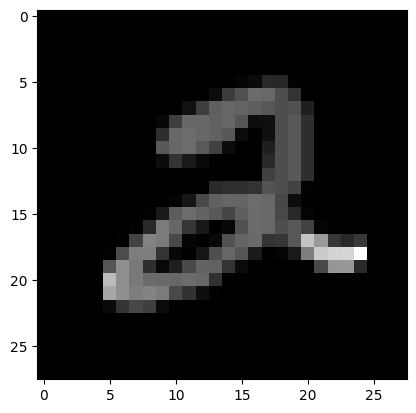

In [13]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5], cmap='gray')

In [ ]:
model = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ]
)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10)



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8475 - loss: 0.4763
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9705 - loss: 0.1036
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9781 - loss: 0.0718
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9835 - loss: 0.0543
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9851 - loss: 0.0474
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9879 - loss: 0.0394
Epoch 7/10


In [ ]:
model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9913 - loss: 0.0300


[0.026552798226475716, 0.9922999739646912]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
3


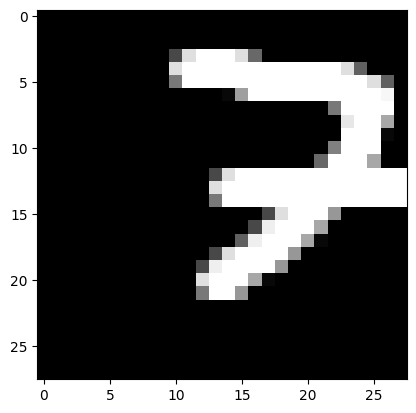

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
8


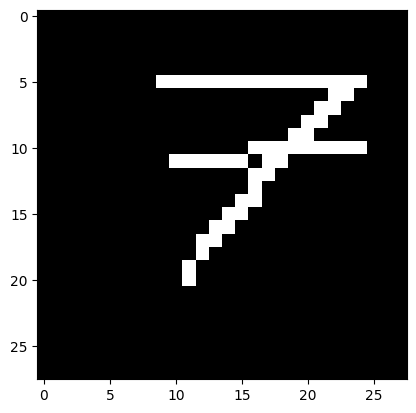

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3


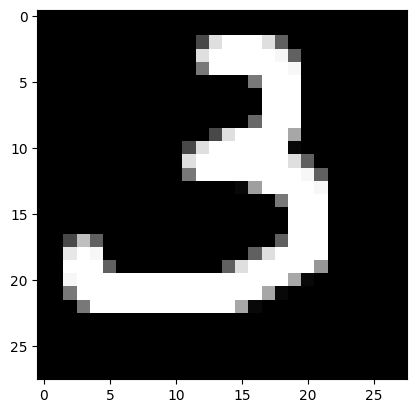

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3


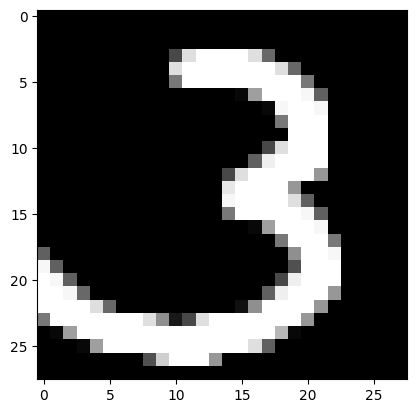

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
5


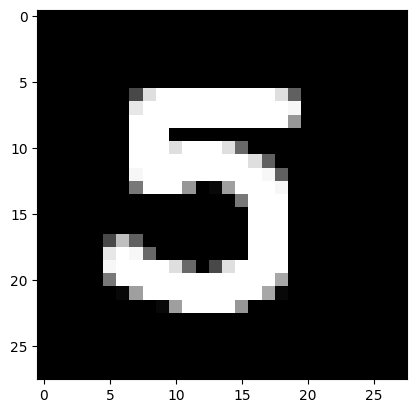

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
7


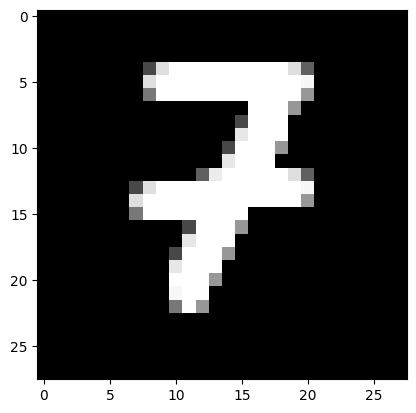

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
6


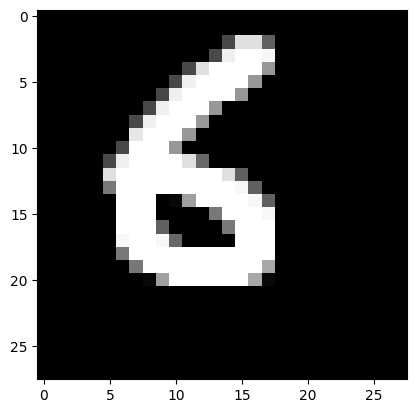

In [ ]:
i = 1
while os.path.exists(f"Untitled{i}.png"):
    img = cv2.imread(f"Untitled{i}.png", cv2.IMREAD_GRAYSCALE)
    img = np.invert(np.array(img))
    img = img.reshape(1, 28, 28, 1)
    y_pred = model.predict(img)
    print(np.argmax(y_pred))
    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.show()
    i += 1